<strong><b><font size="5">Resampling Methods for Inference Analysis in Python</font></b></strong>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

C:\Users\ismiguzel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

In [2]:
df = pd.read_csv('./Fish.csv')
data = df.copy()
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data["Species"].value_counts(normalize=True)

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

# Bootstrapping

In [4]:
data = data.loc[data["Species"] == "Roach"]["Length1"]

35    12.9
36    16.5
37    17.5
38    18.2
39    18.6
Name: Length1, dtype: float64

In [5]:
pd.DataFrame({'values': data.describe()}).reset_index()

,index,values
0,count,20.000000
1,mean,20.645000
2,std,3.459917
3,min,12.900000
4,25%,18.900000
5,50%,20.500000
6,75%,22.025000
7,max,29.500000


In [6]:
print(f'Mean: {data.mean():.2f}')
conf_i = np.percentile(data, [2.5, 97.5])
print(f'Confidence intervals: {conf_i}')

Mean: 20.65
Confidence intervals: [14.61   27.3625]


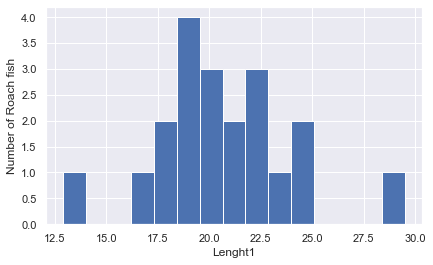

In [8]:
sns.set()
plt.hist(data, bins=15)
plt.xlabel("Lenght1")
plt.ylabel("Number of Roach fish")
plt.savefig("hist1.png")
plt.show()

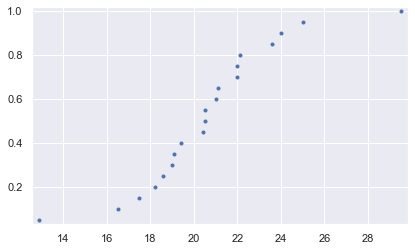

In [10]:
x = np.sort(data)
n = len(data)
y = np.arange(1, n+1)/n
plt.plot(x,y, marker=".", linestyle="none")
plt.margins(0.02)
plt.show()

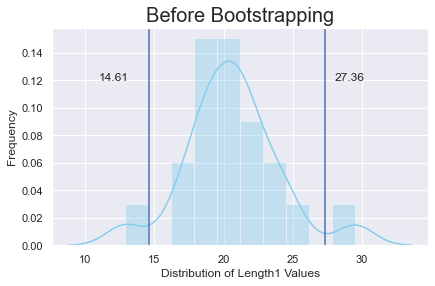

In [11]:
ax = sns.distplot(data,bins=10,kde=True,color='skyblue')
ax.axvline(conf_i[0])
ax.axvline(conf_i[1])
ax.text(11,0.12, conf_i[0])
ax.text(28,0.12, round(conf_i[1],2))
ax.set(xlabel='Distribution of Length1 Values', ylabel='Frequency')
ax.set_title("Before Bootstrapping", fontsize=20)
plt.savefig("fish_ci_before.png")
plt.show();

In [13]:
mean_lengths, n = [], 1000
for i in range(n):
    sample = np.random.choice(data, 
                              replace=True, 
                              size=len(data))
    sample_mean = sample.mean()
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_ci))

Bootstrapped Mean Length = 20.668565, 95% CI = [19.35     22.105375]


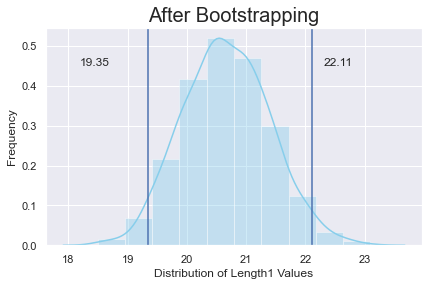

In [14]:
ax = sns.distplot(mean_lengths,bins=10,kde=True,color='skyblue')
ax.axvline(boot_ci[0])
ax.axvline(boot_ci[1])
ax.text(18.2,0.45, round(boot_ci[0], 2))
ax.text(22.3,0.45, round(boot_ci[1], 2))
ax.set_title("After Bootstrapping", fontsize=20)
ax.set(xlabel='Distribution of Length1 Values', ylabel='Frequency')
plt.savefig("fish_ci_after.png")
plt.show();

## Bonus

In [15]:
data = df.copy()
data = data.loc[data["Species"] == "Roach"][["Length1", "Weight"]]
data.sample(2)

,Length1,Weight
41,19.1,110.0
47,21.1,160.0


In [16]:
data.corr()

,Length1,Weight
Length1,1.000000,0.908293
Weight,0.908293,1.000000


In [17]:
data_size, lw_corr = data.shape[0], []
for i in range(1000):
    tmp_df = data.sample(n=data_size, replace=True)
    lw_corr.append(tmp_df["Weight"].corr(tmp_df["Length1"]))

corr_ci = np.percentile(lw_corr, [2.5, 97.5])
print("Correlation 95% Confidence Interval between Weight and Length1 = {}".format(corr_ci))

Correlation 95% Confidence Interval between Weight and Length1 = [0.78039502 0.97998958]


# Jackknife Resampling

In [18]:
data = df.copy()
data = data.loc[data["Species"] == "Roach"]["Length1"]

In [19]:
mean_lengths, n = [], len(data)
index = np.arange(n)

for i in range(n):
    jk_sample = data[index != i]
    mean_lengths.append(jk_sample.mean())

mean_lengths_jk = np.mean(np.array(mean_lengths))
jk_variance = (n-1)*np.var(mean_lengths)
print("Jackknife estimate of the mean = {}".format(mean_lengths_jk))
print("Jackknife estimate of the variance = {}".format(jk_variance))

Jackknife estimate of the mean = 20.645
Jackknife estimate of the variance = 0.5985513157894758


# Permutation Test

In [20]:
data = df.copy()
data = data.loc[data["Species"] == "Roach"][["Length1", "Length2"]]
data.head()

,Length1,Length2
35,12.9,14.1
36,16.5,18.2
37,17.5,18.8
38,18.2,19.8
39,18.6,20.0


In [21]:
print(f'Mean of Length1: {data["Length1"].mean():.2f}')
print(f'Mean of Length2: {data["Length2"].mean():.2f}')

Mean of Length1: 20.65
Mean of Length2: 22.27


In [22]:
sample1 = data["Length1"]
sample2 = data["Length2"]

In [23]:
data = np.concatenate([sample1, sample2])

perm = np.array([np.random.permutation(len(sample1) + len(sample2)) for i in range(10000)])
permuted_1_db = data[perm[:, :len(sample1)]]
permuted_2_db = data[perm[:, len(sample1):]]

samples = np.mean(permuted_1_db, axis=1) - np.mean(permuted_2_db, axis=1)

test_stat = np.mean(sample1) - np.mean(sample2)
p_val = 2*np.sum(samples >= np.abs(test_stat))/10000
print("test_statistic = {}".format(test_stat))
print("p-value = {}".format(p_val))

test_statistic = -1.6299999999999955
p-value = 0.1488
